# 第三次作业

## 问题一

$\qquad$Implement a $Metropolis-Hastings$ algorithm to get samples of a Gaussian mixture: $0.7 \mathcal{N}(-1,2)+0.3 \mathcal{N}(1,1)$ , by standard $\mathcal{N}(0,1)$. Draw a histogram to show these samples (10000).


### Metropolis-Hastings算法的基本原理

$\qquad$Metropolis-Hastings采样算法根据马尔可夫链去生成一个序列：$$\theta^{(1)} \rightarrow \theta^{(2)} \rightarrow \cdots \theta^{(t)} \rightarrow
$$
其中，$\theta^{(t)}$表示的是马尔可夫链在第$t$代时的状态。<br />
$\qquad$在$Metropolis-Hastings$采样算法的过程中，首先初始化状态值$\theta^{(1)}$，然后利用一个已知的分布$q\left(\theta | \theta^{(t-1)}\right)$生成一个新的候选状态$\theta^{(*)}$，随后根据一定的概率选择接受这个新值，或者拒绝这个新值，与$Metropolis$采样算法不同的是，在$Metropolis-Hastings$采样算法中，概率为：$$
\alpha=\min \left(1, \frac{p\left(\theta^{(*)}\right)}{p\left(\theta^{(t-1)}\right)} \frac{q\left(\theta^{(t-1)} | \theta^{(*)}\right)}{q\left(\theta^{(*)} | \theta^{(t-1)}\right)}\right)
$$
$\qquad$这样的过程一直持续到采样过程的收敛，当收敛以后，样本$\theta^{(t)}$即为目标分布$p(\theta)$中的样本。


### Metropolis-Hastings采样算法的流程

$\qquad$基于以上的分析，可以总结出如下的Metropolis-Hastings采样算法的流程：

$\qquad$$\quad$$\bullet~~$初始化时间$t=1$<br />
$\qquad$$\quad$$\bullet~~$设置$u$的值，并初始化初始状态$\theta^{(t)}=u$<br />
$\qquad$$\quad$$\bullet~~$重复以下的过程：<br />
$\qquad$$\qquad$$\bullet~~$令$t=t+1$<br />
$\qquad$$\qquad$$\bullet~~$从已知分布$q\left(\theta | \theta^{(t-1)}\right)$中生成一个候选状态$\theta^{(*)}$<br />
$\qquad$$\qquad$$\bullet~~$计算接受的概率：$\alpha=\min \left(1, \frac{p\left(\theta^{(*)}\right)}{p\left(\theta^{(t-1)}\right)} \frac{q\left(\theta^{(t-1)} | \theta^{(*)}\right)}{q\left(\theta^{(*)} | \theta^{(t-1)}\right)}\right)$<br />
$\qquad$$\qquad$$\bullet~~$从均匀分布$\text {Uniform }(0,1)$生成一个随机值$a$<br />
$\qquad$$\qquad$$\bullet~~$如果$a \leqslant \alpha$，接受新生成的值：$\theta^{(t)}=\theta^{(*)}$；否则：$\theta^{(t)}=\theta^{(t-1)}$<br />
$\qquad$$\quad$$\bullet~~$直到$t=T$<br />


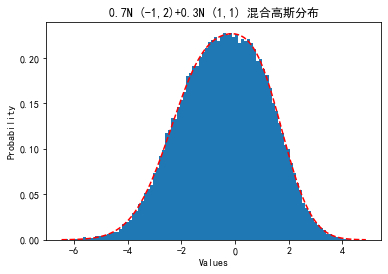

In [3]:
import numpy as np
import matplotlib.pyplot as plt


#  高斯分布概率密度函数
def gauss(x, mu=0.0, sigma=1.0):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(np.power((x - mu), 2)) / (2 * np.power(sigma, 2)))


#  混合高斯分布概率密度函数
def gaussian_mixture(x, lamda_1=0.7, lamda_2=0.3):
    return lamda_1 * gauss(x, -1.0, np.sqrt(2.0)) + lamda_2 * gauss(x, 1.0, 1.0)


if __name__ == '__main__':
    T = 110000
    sample_mixture = [0.0] * (T + 1)
    sample_mixture[0] = np.random.normal(0, 1)
    t = 0
    while t < T:
        t = t + 1
        sample = np.random.normal(0, 1) + sample_mixture[t - 1]
        alpha = min(1, gaussian_mixture(sample) / gaussian_mixture(sample_mixture[t - 1]))
        temp = np.random.uniform(0, 1)
        if temp <= alpha:
            sample_mixture[t] = sample
        else:
            sample_mixture[t] = sample_mixture[t - 1]
    # 舍弃前1000个
    result = sample_mixture[1000:T:1]

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.xlabel('Values')  # 绘制x轴
    plt.ylabel('Probability')  # 绘制y轴

    # 画混合高斯分布
    n, bins, patches = plt.hist(result, bins=100, density=1)
    y = gaussian_mixture(bins)
    plt.plot(bins, y, 'r--')
    plt.title('0.7N (-1,2)+0.3N (1,1) 混合高斯分布')
    plt.show()

## 问题二

$\qquad$Sample $Bivariate ~ Gaussian$ distributions by $Hamiltonian Monte Carlo$, tunning the step-size $\boldsymbol{\varepsilon}$ and the total steps $n$ in each iteration:


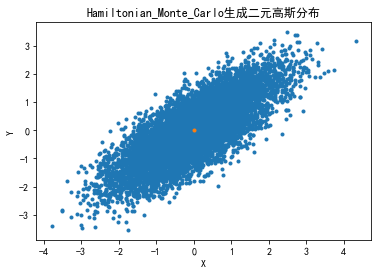

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def dU(x):
    return x.T * np.mat([[1, .8], [.8, 1]]).I
def U(x):
    return (x.T * np.mat([[1, .8], [.8, 1]]).I * x)[0, 0] / 2
def K(p):
    return (p.T * p)[0, 0] / 2

delta = 0.3
nSamples = 10000
L = 20

x = np.mat(np.zeros((2, nSamples)))
x0 = np.mat([[0], [6]])
x[:, 0] = x0
for t in range(nSamples - 1):
    p0 = np.mat(np.random.randn(2, 1))
    # 半步长，leap frog算法
    pStar = p0
    xStar = x[:, t]
    for jL in range(L):
        pStar -= delta / 2 * dU(xStar).T
        xStar += delta * pStar
        pStar -= delta/2*dU(xStar).T

    U0 = U(x[:, t])
    UStar = U(xStar)
    K0 = K(p0)
    KStar = K(pStar)

    alpha = min(1, np.exp((U0 + K0) - (UStar + KStar)))
    u = np.random.rand()
    if u < alpha:
        x[:, t + 1] = xStar
    else:
        x[:, t + 1] = x[:, t]
plt.scatter(x[0, :].tolist()[0], x[1, :].tolist()[0], marker='.')
plt.scatter(0, 0, marker='.')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('X')  # 绘制x轴
plt.ylabel('Y')  # 绘制y轴
plt.title('Hamiltonian_Monte_Carlo生成二元高斯分布')
plt.show()
